In [1]:
from core.model import BBregression
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import scipy.io
import scipy.misc
import numpy as np
import pandas as pd
from core.Dataloader import Dataloader
import cv2
import random
from keras import backend as K

Using TensorFlow backend.


In [2]:
model = BBregression(480)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 480, 480, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 480, 480, 16)      432       
_________________________________________________________________
batch_normalization_1 (Batch (None, 480, 480, 16)      64        
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 480, 480, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 240, 240, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 240, 240, 32)      4608      
_________________________________________________________________
batch_normalization_2 (Batch (None, 240, 240, 32)      128       
__________

In [3]:
df_training = pd.read_csv("./Data/training.csv")
df_test = pd.read_csv("./Data/test.csv")

In [4]:
df_training.head()

,image_name,x1,x2,y1,y2
0,JPEG_20160706_121146_1000145715002.png,115,495,143,325
1,JPEG_20161119_174038_1000690577600.png,23,457,61,409
2,147444927651111470309333776-Roadster-Men-Casua...,37,601,13,470
3,147772332675720161028_161611.png,27,602,162,385
4,1473315333651DeeplearnS11638.png,60,586,174,325


In [5]:
df_test.head()

,image_name,x1,x2,y1,y2
0,1474723840903DSC08089.png,NaN,NaN,NaN,NaN
1,1473231475010DeeplearnS11276.png,NaN,NaN,NaN,NaN
2,JPEG_20161205_135307_1000155917326.png,NaN,NaN,NaN,NaN
3,JPEG_20160711_123440_1000518778437.png,NaN,NaN,NaN,NaN
4,JPEG_20160803_115329_100034020722.png,NaN,NaN,NaN,NaN


In [6]:
#Preprocessing step
df_training['image_name'] = './images/' + df_training['image_name'].astype(str) 
df_test['image_name'] = './images/' + df_test['image_name'].astype(str) 

#Normalizes the bounding box coordinates
#Resizing the images to have 480*480 dimensions, hence changing the box coordinates
df_training['x1'] = df_training['x1']/640
df_training['x2'] = df_training['x2']/640
df_training['y1'] = df_training['y1']/480
df_training['y2'] = df_training['y2']/480
df_training.head()

,image_name,x1,x2,y1,y2
0,./images/JPEG_20160706_121146_1000145715002.png,0.179688,0.773438,0.297917,0.677083
1,./images/JPEG_20161119_174038_1000690577600.png,0.035937,0.714063,0.127083,0.852083
2,./images/147444927651111470309333776-Roadster-...,0.057813,0.939063,0.027083,0.979167
3,./images/147772332675720161028_161611.png,0.042188,0.940625,0.337500,0.802083
4,./images/1473315333651DeeplearnS11638.png,0.093750,0.915625,0.362500,0.677083


./images/JPEG_20160622_125502_100037976219.png


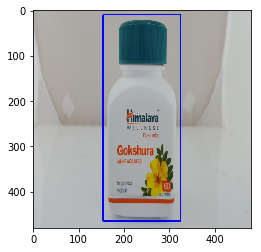

In [7]:
Rand = random.randint(0,len(df_training))
print(df_training.image_name.iloc[Rand])
(img_path,x1,x2,y1,y2) = df_training.iloc[Rand]
[x1,x2,y1,y2] = [x1*480,x2*480,y1*480,y2*480]
img = cv2.imread(img_path) 
img = cv2.resize(img,(480,480))
cv2.rectangle(img, (int(x1),int(y1)), (int(x2),int(y2)), (255,0,0), 2)
temp = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(temp)
plt.show()

In [8]:
#Dividing data into cross-val, train set
#2000 data for cross-val and 12000 for train

df_training = df_training.sample(frac=1).reset_index(drop=True)
df_train = df_training.iloc[:12000,:]
df_test =  df_training.iloc[12000::,:]


In [8]:
df_train.to_csv('./Data/df_train.csv')
df_test.to_csv('./Data/df_test.csv')

In [9]:
# Data Pipeline
Dataload = Dataloader(df=df_train)
img,true_boxes  = Dataload.build_iterator()
with tf.Session() as sess:
    Ans,true = sess.run([img,true_boxes])


In [10]:

with tf.Session() as sess: 
    for i in range(12000//64 + 5):
        Ans,true = sess.run([img,true_boxes])

(64, 480, 480, 3)